<a href="https://colab.research.google.com/github/vishwak2k1/EIP3.0-Batch5/blob/master/3A_99_28_Achieved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# https://keras.io/
!pip install -q keras
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, GlobalAveragePooling2D, DepthwiseConv2D
from keras.layers import Convolution2D, MaxPooling2D, Convolution1D, SeparableConvolution2D, AveragePooling2D, BatchNormalization
from keras.utils import np_utils
from keras.optimizers import Adadelta, Adagrad, Adam, SGD

from keras.datasets import mnist


In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)


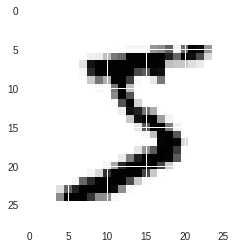

In [5]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [6]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
y_train[:10]
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

# MODEL 1

In [33]:
from keras.layers import Activation
model = Sequential()


model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(BatchNormalization())
#model.add(AveragePooling2D(pool_size=(2, 2), strides=(1, 1),padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(SeparableConvolution2D(32,kernel_size=(3,3),padding='valid'))
model.add(BatchNormalization())
model.add(SeparableConvolution2D(32,kernel_size=(3,3),padding='valid'))
model.add(BatchNormalization())
model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(SeparableConvolution2D(32,kernel_size=(1,1),padding='valid'))
model.add(BatchNormalization())

model.add(Convolution2D(10, 1, activation='relu')) 
model.add(Convolution2D(10, 4))
model.add(Flatten())
model.add(Activation('softmax'))

model.summary()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_53 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_53 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
separable_conv2d_40 (Separab (None, 10, 10, 32)        1344      
_________________________________________________________________
batch_normalization_54 (Batc (None, 10, 10, 32)        128       
_________________________________________________________________
separable_conv2d_41 (Separab (None, 8, 8, 32)          1344      
__________

In [34]:
model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(lr=0.0012),
             metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=512, nb_epoch=200, verbose=1)
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  after removing the cwd from sys.path.


Epoch 1/200
60000/60000 [==============================] - 11s 185us/step - loss: 0.5034 - acc: 0.8580
Epoch 2/200
60000/60000 [==============================] - 6s 108us/step - loss: 0.0952 - acc: 0.9719
Epoch 3/200
60000/60000 [==============================] - 6s 108us/step - loss: 0.0663 - acc: 0.9802
Epoch 4/200
60000/60000 [==============================] - 6s 108us/step - loss: 0.0546 - acc: 0.9834
Epoch 5/200
60000/60000 [==============================] - 6s 107us/step - loss: 0.0444 - acc: 0.9865
Epoch 6/200
60000/60000 [==============================] - 7s 109us/step - loss: 0.0389 - acc: 0.9879
Epoch 7/200
60000/60000 [==============================] - 7s 109us/step - loss: 0.0344 - acc: 0.9896
Epoch 8/200
60000/60000 [==============================] - 6s 108us/step - loss: 0.0311 - acc: 0.9906
Epoch 9/200
60000/60000 [==============================] - 6s 108us/step - loss: 0.0292 - acc: 0.9911
Epoch 10/200
60000/60000 [==============================] - 7s 108us/step - loss:

In [91]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.054321200714715995, 0.9906]


In [0]:
# Name : Viswanath K
# Email: vishwak2k1@gmail.com
# EIP3.0 Batch 5
# https://www.youtube.com/watch?v=gmBfb6LNnZs
# Learnable Parameters in a Convolutional Neural Network (CNN) explained

# MODEL 2

In [0]:
from keras.layers import Activation
model = Sequential()


model.add(SeparableConvolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(SeparableConvolution2D(32, 3, 3, activation='relu'))
#model.add(SeparableConvolution2D(32,kernel_size=(3,3),padding='valid'))
model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2),padding='same'))
#model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(SeparableConvolution2D(32,kernel_size=(3,3),padding='valid'))
model.add(SeparableConvolution2D(32,kernel_size=(3,3),padding='valid'))
model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2),padding='same'))

#model.add(SeparableConvolution2D(32,kernel_size=(3,3),padding='valid'))
#model.add(SeparableConvolution2D(32,kernel_size=(3,3),padding='valid'))
#model.add(SeparableConvolution2D(32,kernel_size=(3,3),padding='valid'))

model.add(Convolution2D(10, 1, activation='relu')) 
model.add(Convolution2D(10, 4))
model.add(Flatten())
model.add(Activation('softmax'))

model.summary()
model.compile(loss='categorical_crossentropy', 
             optimizer='SGD',
             metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=32, nb_epoch=1, verbose=1)
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(32, (3, 3), activation="relu")`
  


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_3 (Separabl (None, 26, 26, 32)        73        
_________________________________________________________________
separable_conv2d_4 (Separabl (None, 24, 24, 32)        1344      
_________________________________________________________________
average_pooling2d_3 (Average (None, 12, 12, 32)        0         
_________________________________________________________________
separable_conv2d_5 (Separabl (None, 10, 10, 32)        1344      
_________________________________________________________________
separable_conv2d_6 (Separabl (None, 8, 8, 32)          1344      
_________________________________________________________________
average_pooling2d_4 (Average (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 4, 4, 10)          330       
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/1
60000/60000 [==============================] - 86s 1ms/step - loss: 2.3017 - acc: 0.1119
[2.301089622116089, 0.1135]


In [0]:
from keras.layers import Activation
model = Sequential()


model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(32, 3, 3, activation='relu'))
#model.add(SeparableConvolution2D(32,kernel_size=(3,3),padding='valid'))
model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2),padding='same'))
#model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Convolution2D(32,kernel_size=(3,3),padding='valid'))
model.add(Convolution2D(32,kernel_size=(3,3),padding='valid'))
model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2),padding='same'))

#model.add(SeparableConvolution2D(32,kernel_size=(3,3),padding='valid'))
#model.add(SeparableConvolution2D(32,kernel_size=(3,3),padding='valid'))
#model.add(SeparableConvolution2D(32,kernel_size=(3,3),padding='valid'))

model.add(Convolution2D(10, 1, activation='relu')) 
model.add(Convolution2D(10, 4))
model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', 
             optimizer='SGD',
             metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=32, nb_epoch=1, verbose=1)
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
average_pooling2d_5 (Average (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 10, 10, 32)        9248      
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 8, 8, 32)          9248      
_________________________________________________________________
average_pooling2d_6 (Average (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 4, 4, 10)          330       
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/1
60000/60000 [==============================] - 129s 2ms/step - loss: 0.7171 - acc: 0.7616
[0.261438225454092, 0.9229]


In [0]:
from keras.layers import Activation
model = Sequential()


model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(32, 3, 3, activation='relu'))
#model.add(SeparableConvolution2D(32,kernel_size=(3,3),padding='valid'))
model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2),padding='same'))
#model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Convolution2D(32,kernel_size=(3,3),padding='valid'))
model.add(SeparableConvolution2D(32,kernel_size=(3,3),padding='valid'))
model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2),padding='same'))

#model.add(SeparableConvolution2D(32,kernel_size=(3,3),padding='valid'))
#model.add(SeparableConvolution2D(32,kernel_size=(3,3),padding='valid'))
#model.add(SeparableConvolution2D(32,kernel_size=(3,3),padding='valid'))

model.add(Convolution2D(10, 1, activation='relu')) 
model.add(Convolution2D(10, 4))
model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', 
             optimizer='SGD',
             metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=32, nb_epoch=1, verbose=1)
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
average_pooling2d_7 (Average (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 10, 10, 32)        9248      
_________________________________________________________________
separable_conv2d_7 (Separabl (None, 8, 8, 32)          1344      
_________________________________________________________________
average_pooling2d_8 (Average (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 4, 4, 10)          330       
__________

In [0]:
from keras.layers import Activation
model = Sequential()


model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(32, 3, 3, activation='relu'))
#model.add(SeparableConvolution2D(32,kernel_size=(3,3),padding='valid'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2),padding='same'))
#model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Convolution2D(32,kernel_size=(3,3),padding='valid'))
model.add(SeparableConvolution2D(32,kernel_size=(3,3),padding='valid'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2),padding='same'))

#model.add(SeparableConvolution2D(32,kernel_size=(3,3),padding='valid'))
#model.add(SeparableConvolution2D(32,kernel_size=(3,3),padding='valid'))
#model.add(SeparableConvolution2D(32,kernel_size=(3,3),padding='valid'))

model.add(Convolution2D(10, 1, activation='relu')) 
model.add(Convolution2D(10, 4))
model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', 
             optimizer='SGD',
             metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_101 (Conv2D)          (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_102 (Conv2D)          (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_103 (Conv2D)          (None, 10, 10, 32)        9248      
_________________________________________________________________
separable_conv2d_26 (Separab (None, 8, 8, 32)          1344      
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_104 (Conv2D)          (None, 4, 4, 10)          330       
__________

In [0]:
from keras.layers import Activation
model = Sequential()


model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(32, 3, 3, activation='relu'))
#model.add(SeparableConvolution2D(32,kernel_size=(3,3),padding='valid'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2),padding='same'))
#model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(DepthwiseConv2D(32,kernel_size=(3,3),padding='valid'))
model.add(SeparableConvolution2D(32,kernel_size=(3,3),padding='valid'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2),padding='same'))

#model.add(SeparableConvolution2D(32,kernel_size=(3,3),padding='valid'))
#model.add(SeparableConvolution2D(32,kernel_size=(3,3),padding='valid'))
#model.add(SeparableConvolution2D(32,kernel_size=(3,3),padding='valid'))

model.add(Convolution2D(10, 1, activation='relu')) 
model.add(Convolution2D(10, 4))
model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', 
             optimizer='SGD',
             metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=32, nb_epoch=1, verbose=1)
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)




Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  


TypeError: ignored

# MODEL 3

In [0]:
from keras.layers import Activation
model = Sequential()


model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(Convolution2D(16, 3, 3, activation='relu'))
#model.add(SeparableConvolution2D(32,kernel_size=(3,3),padding='valid'))
model.add(AveragePooling2D(pool_size=(2, 2), strides=(1, 1),padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(SeparableConvolution2D(32,kernel_size=(3,3),padding='valid'))
#model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))

#model.add(SeparableConvolution2D(32,kernel_size=(3,3),padding='valid'))
#model.add(SeparableConvolution2D(32,kernel_size=(3,3),padding='valid'))
#model.add(SeparableConvolution2D(32,kernel_size=(3,3),padding='valid'))

model.add(Convolution2D(10, 1, activation='relu')) 
model.add(Convolution2D(10, 7))
model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

# MODEL using Depthwise 2D Convolution and Batch  Normalization

In [35]:
from keras.layers import Activation
model = Sequential()


model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(DepthwiseConv2D(depth_multiplier = 1, kernel_size=(3, 3), 
                          input_shape = (22,22,3), padding = 'valid', strides = (1,1)))
#model.add(SeparableConvolution2D(32,kernel_size=(3,3),padding='valid'))
#model.add(AveragePooling2D(pool_size=(2, 2), strides=(1, 1),padding='same'))
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Convolution2D(16, 3, 3, activation='relu'))
model.add(DepthwiseConv2D(depth_multiplier = 1, kernel_size=(3, 3), 
                          input_shape = (9,9,3), padding = 'valid', strides = (1,1)))
model.add(BatchNormalization())
#model.add(SeparableConvolution2D(32,kernel_size=(3,3),padding='valid'))
#model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))

#model.add(SeparableConvolution2D(32,kernel_size=(3,3),padding='valid'))
#model.add(SeparableConvolution2D(32,kernel_size=(3,3),padding='valid'))
#model.add(SeparableConvolution2D(32,kernel_size=(3,3),padding='valid'))

model.add(Convolution2D(10, 1, activation='relu')) 
model.add(Convolution2D(10, 6))
model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_57 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 24, 24, 16)        4624      
_________________________________________________________________
batch_normalization_57 (Batc (None, 24, 24, 16)        64        
_________________________________________________________________
depthwise_conv2d_1 (Depthwis (None, 22, 22, 16)        160       
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 20, 20, 16)        2320      
_________________________________________________________________
average_pooling2d_15 (Averag (None, 10, 10, 16)        0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 8, 8, 16)          2320      
__________

In [36]:
#sgd = SGD(lr=0.001)
#sgd = optimizer.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', 
             optimizer=Adam(lr=0.0012),
             metrics=['accuracy'])

model.fit(X_train, Y_train, batch_size=512, nb_epoch=150, verbose=1)
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """


Epoch 1/150
60000/60000 [==============================] - 12s 207us/step - loss: 0.5162 - acc: 0.8517
Epoch 2/150
60000/60000 [==============================] - 8s 128us/step - loss: 0.0813 - acc: 0.9763
Epoch 3/150
60000/60000 [==============================] - 8s 128us/step - loss: 0.0546 - acc: 0.9839
Epoch 4/150
60000/60000 [==============================] - 8s 129us/step - loss: 0.0448 - acc: 0.9870
Epoch 5/150
60000/60000 [==============================] - 8s 130us/step - loss: 0.0386 - acc: 0.9885
Epoch 6/150
60000/60000 [==============================] - 8s 131us/step - loss: 0.0336 - acc: 0.9898
Epoch 7/150
60000/60000 [==============================] - 8s 131us/step - loss: 0.0287 - acc: 0.9915
Epoch 8/150
60000/60000 [==============================] - 8s 128us/step - loss: 0.0261 - acc: 0.9924
Epoch 9/150
60000/60000 [==============================] - 8s 129us/step - loss: 0.0239 - acc: 0.9926
Epoch 10/150
60000/60000 [==============================] - 8s 130us/step - loss: